# CS4622 - Machine Learning
# Project - Speaker, age, gender and accent recognition using wav2vec base

# Layer 8

# Load Data

In [1]:
!pip install kaggle seaborn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=7529141f22476b4f6d43dcdaf5ab225ea38d0a0a50be9fbbd0d94176072a3ee7
  Stored in directory: /root/.cache/pip/wheels/5a/ab/50/e224f599a07faf6d398a8600796012da271b7e5e7f2a3ab2b8
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Load the data
train_data = pd.read_csv('Data/train.csv')
valid_data = pd.read_csv('Data/valid.csv')
test_data = pd.read_csv('Data/test.csv')

In [4]:
train_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.000905,0.046109,-0.007867,0.006516,-0.084563,-0.041206,0.115190,-0.062550,-0.015853,-0.018170,...,-0.041763,0.008129,-0.005715,0.048044,0.037690,-0.038338,30.498843,27.975107,0.799299,5.997125
std,0.074272,0.051005,0.059429,0.083817,0.079565,0.055698,0.100403,0.069030,0.061706,0.062766,...,0.078832,0.064496,0.059127,0.068831,0.056442,0.089426,17.328389,5.735913,0.400532,2.375567
min,-0.263766,-0.167903,-0.241743,-0.310653,-0.521423,-0.303506,-0.266982,-0.351085,-0.286419,-0.275221,...,-0.351263,-0.243115,-0.267768,-0.244857,-0.179989,-0.348414,1.000000,22.000000,0.000000,0.000000
25%,-0.050877,0.009260,-0.049900,-0.046124,-0.135082,-0.075579,0.040635,-0.107370,-0.057616,-0.056116,...,-0.094268,-0.033156,-0.044131,0.002746,-0.001078,-0.096872,15.000000,25.000000,1.000000,6.000000
50%,-0.005263,0.046863,-0.009273,0.010040,-0.081096,-0.039769,0.113300,-0.058721,-0.020981,-0.018736,...,-0.041934,0.009489,-0.002159,0.040703,0.035666,-0.034802,30.000000,27.000000,1.000000,6.000000
75%,0.049738,0.082203,0.032208,0.063190,-0.033008,-0.004525,0.184644,-0.016211,0.023647,0.022856,...,0.010713,0.051168,0.035046,0.086970,0.074293,0.019831,46.000000,30.000000,1.000000,6.000000
max,0.305164,0.257933,0.240829,0.286214,0.214045,0.216048,0.466118,0.195778,0.258841,0.207526,...,0.303684,0.250487,0.276657,0.396895,0.297229,0.283199,60.000000,61.000000,1.000000,13.000000


In [3]:
valid_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,0.002629,0.045339,-0.007939,0.003979,-0.087809,-0.038223,0.112724,-0.066751,-0.015791,-0.021099,...,-0.040125,0.006835,-0.003307,0.047442,0.039883,-0.035003,30.085333,28.330163,0.810667,6.117333
std,0.073356,0.054732,0.061638,0.086686,0.076156,0.059974,0.098778,0.070885,0.060367,0.063077,...,0.079482,0.063113,0.058104,0.067712,0.056110,0.090682,17.489060,6.518500,0.392035,2.227895
min,-0.208676,-0.118051,-0.164100,-0.241533,-0.306765,-0.222245,-0.179094,-0.278774,-0.222152,-0.243257,...,-0.313659,-0.228801,-0.208390,-0.170762,-0.108228,-0.295577,1.000000,22.000000,0.000000,0.000000
25%,-0.048063,0.004218,-0.050210,-0.051797,-0.141736,-0.073480,0.039855,-0.111062,-0.057787,-0.056611,...,-0.096236,-0.032558,-0.041780,0.004044,0.004210,-0.098228,15.000000,25.000000,1.000000,6.000000
50%,-0.001621,0.045285,-0.009527,0.008934,-0.084373,-0.035660,0.109413,-0.063984,-0.016004,-0.020811,...,-0.040675,0.008233,0.002093,0.038779,0.036438,-0.032180,29.000000,27.000000,1.000000,6.000000
75%,0.051251,0.084526,0.030097,0.064821,-0.035880,-0.002297,0.183114,-0.021565,0.025685,0.016384,...,0.016651,0.049676,0.036406,0.083856,0.074590,0.021674,45.000000,30.000000,1.000000,6.000000
max,0.227956,0.213754,0.179822,0.218292,0.145068,0.175861,0.365379,0.167460,0.163337,0.195148,...,0.170859,0.188099,0.180689,0.304480,0.301419,0.223179,60.000000,61.000000,1.000000,13.000000


In [6]:
test_data.describe()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,372.500000,0.005398,0.046413,-0.003152,0.007886,-0.084819,-0.042217,0.115549,-0.060058,-0.014774,...,-0.004586,0.053022,0.057065,-0.035076,-0.042026,0.011620,-0.005678,0.046011,0.038638,-0.041321
std,214.918589,0.077064,0.047604,0.060536,0.081165,0.081220,0.056322,0.099040,0.067562,0.060351,...,0.074476,0.058834,0.072683,0.140571,0.076752,0.063125,0.057875,0.071044,0.057567,0.087205
min,1.000000,-0.215194,-0.088241,-0.179731,-0.226406,-0.463127,-0.235149,-0.254034,-0.273333,-0.161935,...,-0.270497,-0.149944,-0.201129,-0.456167,-0.317826,-0.207807,-0.242382,-0.137129,-0.128690,-0.302213
25%,186.750000,-0.044833,0.013775,-0.044619,-0.036708,-0.132045,-0.077440,0.042790,-0.104205,-0.057439,...,-0.049317,0.014898,0.013073,-0.128789,-0.094230,-0.027420,-0.042252,0.001658,-0.001763,-0.099365
50%,372.500000,-0.000147,0.048187,-0.006010,0.013099,-0.083526,-0.041958,0.117624,-0.057504,-0.019028,...,-0.000828,0.056800,0.057820,-0.035386,-0.044026,0.015901,-0.003575,0.041454,0.036783,-0.038746
75%,558.250000,0.049941,0.080107,0.036146,0.059325,-0.032098,-0.003731,0.182336,-0.017095,0.024792,...,0.045909,0.091388,0.103593,0.059818,0.012584,0.053353,0.035534,0.085985,0.076028,0.014671
max,744.000000,0.231716,0.194577,0.232407,0.232575,0.214991,0.143599,0.445175,0.119893,0.186116,...,0.214002,0.246139,0.281964,0.412875,0.206010,0.227464,0.152160,0.289267,0.254390,0.217821


# Handling missing values

In [4]:
# Handle missing values
missing_train = train_data.isnull().sum()
missing_valid = valid_data.isnull().sum()
print("missing_train:")
print(missing_train)
print("\nmissing_valid:")
print(missing_valid)

missing_train:
feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

missing_valid:
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64


There are missing values in `label_2`.

In [5]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
columns = ['label_2']
imputer.fit(train_data[columns])

train_data[columns] = imputer.transform(train_data[columns]).round().astype(int)
valid_data[columns] = imputer.transform(valid_data[columns]).round().astype(int)

In [6]:
# Check missing values again
labels = ["label_1", "label_2", "label_3", "label_4"]
train_data[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

In [7]:
valid_data[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

# Functions

In [12]:
# Function for plot class distribution

def plot_class_distribution(y):
    class_counts = y.value_counts()
    plt.figure(figsize=(18, 6))
    plt.title("Class distribution")
    sns.barplot(x=class_counts.index, y=class_counts.values, color='blue')
    plt.show()

In [13]:
# Function for roboust scaling

def robust_scale_data(X_train, X_valid, X_test):
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
    X_test_scaled = pd.DataFrame(scaler.transform(X_test))
    return X_train_scaled, X_valid_scaled, X_test_scaled

In [14]:
# Function for standard scaling

def standard_scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
    X_test_scaled = pd.DataFrame(scaler.transform(X_test))
    return X_train_scaled, X_valid_scaled, X_test_scaled

In [15]:
# Function for Principal Component Analysis

def pca(X_train, X_valid, X_test, n_components=0.95, svd_solver='full'):
    pca = PCA(n_components=n_components, svd_solver=svd_solver)
    pca.fit(X_train)
    X_train_trf = pd.DataFrame(pca.transform(X_train))
    X_valid_trf = pd.DataFrame(pca.transform(X_valid))
    X_test_trf = pd.DataFrame(pca.transform(X_test))
    return X_train_trf, X_valid_trf, X_test_trf

In [16]:
# KNN Classifier Model

def knn_model(X_train, y_train, X_valid, y_valid, n_neighbors=5, weights='uniform', metric='minkowski'):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_train, y_train)
    return knn

In [17]:
# SVC Model

def svc_model(X_train, y_train, X_valid, y_valid, C=1.0, kernel='linear'):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(X_train, y_train)
    return svc

In [18]:
# Support Vector Machine RandomizedSearchCV

def svc(X_train, y_train, X_valid, y_valid, param_grid, n_iter=3, cv=3):
    svc = SVC()
    svc.fit(X_train, y_train)
    svc_cv = RandomizedSearchCV(
        svc, param_grid, n_iter=n_iter, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1)
    svc_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(svc_cv.best_params_))
    print("Best score: {}".format(svc_cv.best_score_))

    y_pred = svc_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))

    return svc_cv

In [20]:
# KNN hyperparameter tuning RandomizedSearchCV

def knn(X_train, y_train, X_valid, y_valid, n_iter=20, cv=5):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                  'metric': ['euclidean', 'manhattan']}

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_cv = RandomizedSearchCV(
        knn, param_grid, n_iter=n_iter, cv=cv, random_state=42, n_jobs=10)
    knn_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(knn_cv.best_params_))
    print("Best score: {}".format(knn_cv.best_score_))

    y_pred = knn_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))

    return knn_cv

In [21]:
# Random Forest hyperparameter tuning RandomizedSearchCV

def random_forest(X_train, y_train, X_valid, y_valid):
    param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                  'max_depth': list(np.arange(10, 110, 10)),}

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_cv = RandomizedSearchCV(
        rf, param_grid, n_iter=3, cv=3, random_state=42, n_jobs=10)
    rf_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(rf_cv.best_params_))
    print("Best score: {}".format(rf_cv.best_score_))

    y_pred = rf_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))

In [22]:
# SMOTE Oversampling

def smote_oversampling(X_train, y_train, verbose=0):
    counter = Counter(y_train)
    if(verbose):
        print('Before SMOTE:',counter)

    oversample = SMOTE(sampling_strategy='auto', random_state=42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    counter = Counter(y_train)
    if(verbose):
        print('After SMOTE:',counter)
    return X_train, y_train

In [23]:
# Cross validation score

def cross_validation_score(model, X_train, y_train, cv=3):
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.3f}".format(scores.mean()))

In [24]:
# Create output csv file

def create_output_csv(y_pred, file_name):
    output_filename = f"Results/{file_name}.csv"
    df = pd.DataFrame(y_pred)
    df.to_csv(output_filename, index=False)

# `label_1`: Speaker ID

In [39]:
# Split X and y
X_train_label_1 = train_data.iloc[:, :-4]
y_train_label_1 = train_data['label_1']
X_valid_label_1 = valid_data.iloc[:, :-4]
y_valid_label_1 = valid_data['label_1']
X_test_label_1 = test_data.iloc[:, 1:]

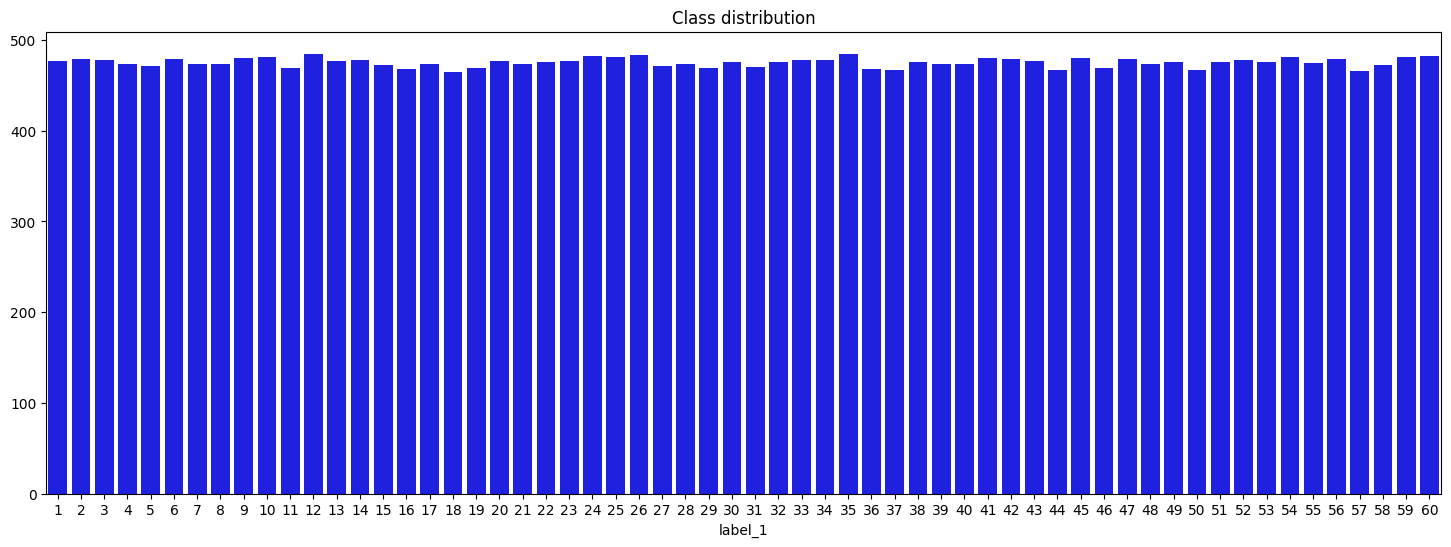

In [40]:
# Plot class distribution
plot_class_distribution(y_train_label_1)

In [41]:
# Robust scaling
X_train_label_1, X_valid_label_1, X_test_label_1 = robust_scale_data(X_train_label_1, X_valid_label_1, X_test_label_1)

In [42]:
X_train_label_1.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.766016,0.295427,-0.164127,0.696195,1.052736,0.154139,0.596750,-2.508230,-0.474751,-0.316034,...,-0.149035,0.164101,0.813487,-1.247316,0.443694,1.346261,0.570858,-0.983744,-0.125249,0.920499
1,0.359720,-0.312231,0.817022,-2.203892,-0.638601,2.006582,0.107406,-0.960394,0.921370,0.938484,...,-0.071891,-0.409799,-0.015157,-1.635026,1.139976,0.856246,-0.033074,1.555662,-0.818520,1.764231
2,-0.385184,-0.705889,-0.244921,-1.604691,0.533781,0.163629,-0.853760,-0.256330,0.491166,0.323734,...,-0.057287,0.052298,0.411078,-0.579399,1.125754,-0.661278,0.378768,-0.149678,-0.061985,0.381406
3,-0.804823,1.134060,-0.056266,0.730421,-0.188143,0.064521,0.886619,-0.763954,-0.631866,-0.008216,...,-0.409805,-0.149830,-0.050637,0.207304,0.465489,-0.696154,1.023164,0.565408,1.766586,-0.123267
4,1.308739,0.568597,1.188426,0.094508,2.503212,0.129607,0.471248,0.541238,1.309032,0.437608,...,-0.302635,0.691609,-0.035799,-0.835593,0.124318,1.201968,-0.501605,-0.178291,-0.426316,-0.601031


In [28]:
# Apply PCA
X_train_trf_label_1, X_valid_trf_label_1, X_test_trf_label_1 = pca(X_train_label_1, X_valid_label_1, X_test_label_1)

In [29]:
X_train_trf_label_1.shape

(28520, 309)

In [34]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf', 'linear'],
              }

# Support Vector Machine Best Model
best_model_1_svc = svc(X_train_trf_label_1, y_train_label_1, X_valid_trf_label_1, y_valid_label_1, param_grid, 5)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 100}

Best score: 0.9498597475455821

Accuracy score 0.960


In [35]:
# Predict using selected Model ('kernel': 'rbf', 'C': 100)

y_pred_label_1 = best_model_1_svc.predict(X_valid_trf_label_1)
score_label_1 = accuracy_score(y_valid_label_1, y_pred_label_1)
print("Accuracy score {:.3f}".format(score_label_1))

Accuracy score 0.960


In [36]:
# Predict test data
y_test_pred_label_1 = best_model_1_svc.predict(X_test_trf_label_1)

In [37]:
# Create output csv file for label_1
create_output_csv(y_test_pred_label_1, "label_1")

# `label_2` : Speaker Age

In [37]:
# Split X and y
X_train_label_2 = train_data.iloc[:, :-4]
y_train_label_2 = train_data['label_2']
X_valid_label_2 = valid_data.iloc[:, :-4]
y_valid_label_2 = valid_data['label_2']
X_test_label_2 = test_data.iloc[:, 1:]

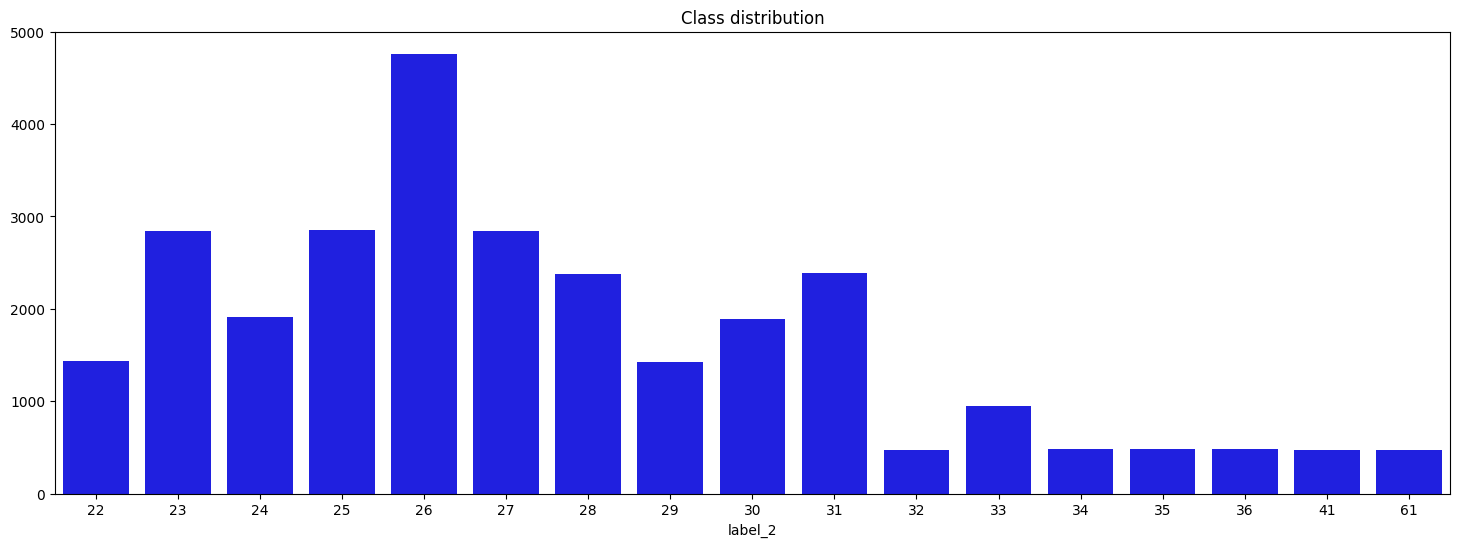

In [38]:
# Plot class distribution
plot_class_distribution(y_train_label_2)

In [39]:
# Robust scaling
X_train_label_2, X_valid_label_2, X_test_label_2 = robust_scale_data(X_train_label_2, X_valid_label_2, X_test_label_2)

In [40]:
X_train_label_2.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.766016,0.295427,-0.164127,0.696195,1.052736,0.154139,0.596750,-2.508230,-0.474751,-0.316034,...,-0.149035,0.164101,0.813487,-1.247316,0.443694,1.346261,0.570858,-0.983744,-0.125249,0.920499
1,0.359720,-0.312231,0.817022,-2.203892,-0.638601,2.006582,0.107406,-0.960394,0.921370,0.938484,...,-0.071891,-0.409799,-0.015157,-1.635026,1.139976,0.856246,-0.033074,1.555662,-0.818520,1.764231
2,-0.385184,-0.705889,-0.244921,-1.604691,0.533781,0.163629,-0.853760,-0.256330,0.491166,0.323734,...,-0.057287,0.052298,0.411078,-0.579399,1.125754,-0.661278,0.378768,-0.149678,-0.061985,0.381406
3,-0.804823,1.134060,-0.056266,0.730421,-0.188143,0.064521,0.886619,-0.763954,-0.631866,-0.008216,...,-0.409805,-0.149830,-0.050637,0.207304,0.465489,-0.696154,1.023164,0.565408,1.766586,-0.123267
4,1.308739,0.568597,1.188426,0.094508,2.503212,0.129607,0.471248,0.541238,1.309032,0.437608,...,-0.302635,0.691609,-0.035799,-0.835593,0.124318,1.201968,-0.501605,-0.178291,-0.426316,-0.601031


In [41]:
# SMOTE Oversampling
X_train_resampled_label_2, y_train_resampled_label_2 = smote_oversampling(X_train_label_2, y_train_label_2, verbose=1)

Before SMOTE: Counter({26: 4762, 25: 2849, 27: 2846, 23: 2842, 31: 2385, 28: 2379, 24: 1906, 30: 1894, 22: 1432, 29: 1424, 33: 945, 36: 481, 35: 480, 34: 478, 32: 476, 41: 474, 61: 467})
After SMOTE: Counter({28: 4762, 25: 4762, 27: 4762, 23: 4762, 33: 4762, 34: 4762, 22: 4762, 30: 4762, 26: 4762, 24: 4762, 31: 4762, 29: 4762, 61: 4762, 36: 4762, 32: 4762, 35: 4762, 41: 4762})


In [42]:
# Apply PCA
X_train_trf_label_2, X_valid_trf_label_2, X_test_trf_label_2 = pca(X_train_resampled_label_2, X_valid_label_2, X_test_label_2, n_components=0.96)

In [43]:
X_train_trf_label_2.shape

(80954, 317)

In [44]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf'] }

# Support Vector Machine Best Model
best_model_2 = svc(X_train_trf_label_2, y_train_resampled_label_2,
                   X_valid_trf_label_2, y_valid_label_2, param_grid=param_grid, n_iter=2, cv=3)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 10}
Best score: 0.944425269256932
Accuracy score 0.993


In [45]:
# Predict using selected Model ('kernel': 'rbf', 'C': 10)
y_pred_label_2 = best_model_2.predict(X_valid_trf_label_2)
score_label_2 = accuracy_score(y_valid_label_2, y_pred_label_2)
print("Accuracy score {:.3f}".format(score_label_2))

Accuracy score 0.993


In [46]:
# Predict test data
y_test_pred_label_2 = best_model_2.predict(X_test_trf_label_2)

In [47]:
# Create output csv file for label_2
create_output_csv(y_test_pred_label_2, "label_2")

# `label_3` : Speaker Gender

In [25]:
# Split X and y
X_train_label_3 = train_data.iloc[:, :-4]
y_train_label_3 = train_data['label_3']
X_valid_label_3 = valid_data.iloc[:, :-4]
y_valid_label_3 = valid_data['label_3']
X_test_label_3 = test_data.iloc[:, 1:]

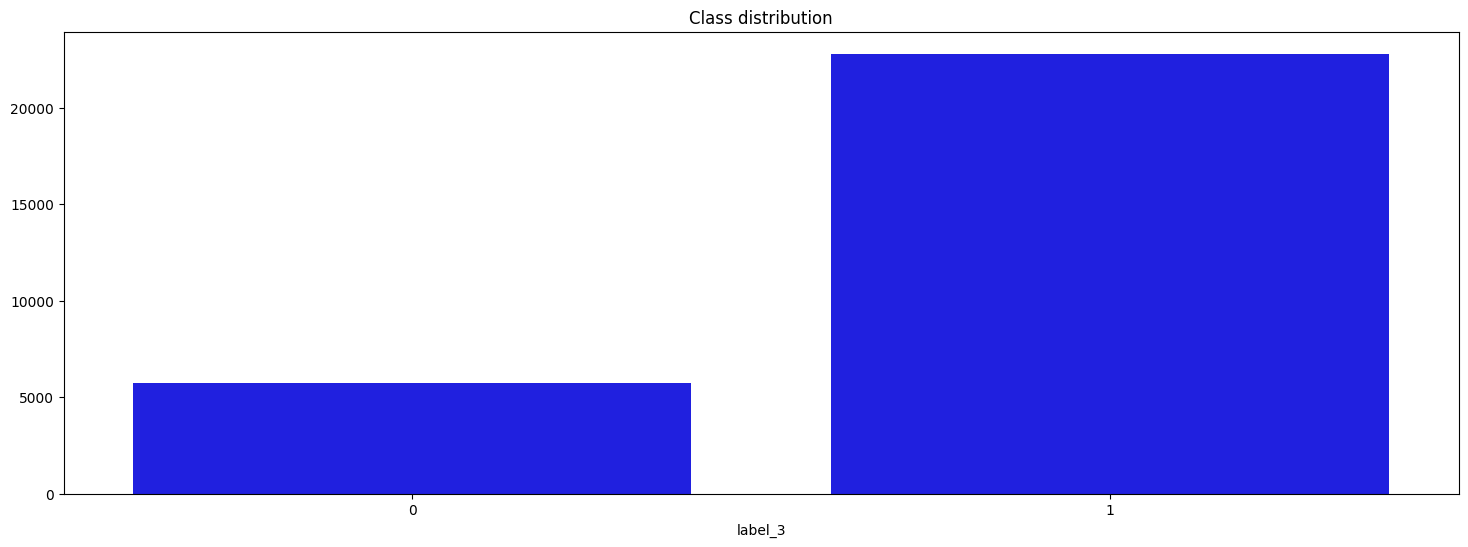

In [26]:
# Plot class distribution
plot_class_distribution(y_train_label_3)

In [27]:
# Robust scaling
X_train_label_3, X_valid_label_3, X_test_label_3 = robust_scale_data(
    X_train_label_3, X_valid_label_3, X_test_label_3)

In [28]:
# SMOTE Oversampling
X_train_resampled_label_3, y_train_resampled_label_3 = smote_oversampling(X_train_label_3, y_train_label_3, verbose=1)

Before SMOTE: Counter({1: 22796, 0: 5724})
After SMOTE: Counter({1: 22796, 0: 22796})


In [33]:
# Apply PCA
X_train_trf_label_3, X_valid_trf_label_3, X_test_trf_label_3 = pca(X_train_resampled_label_3, X_valid_label_3, X_test_label_3, n_components=0.95)

In [34]:
X_train_trf_label_3.shape

(45592, 286)

In [35]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf'],
              }

# Support Vector Machine Best Model
best_model_3 = svc(X_train_trf_label_3, y_train_resampled_label_3,
                   X_valid_trf_label_3, y_valid_label_3, param_grid=param_grid, n_iter=2, cv=3)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 10}
Best score: 0.9957229742542654
Accuracy score 1.000


In [ ]:
# KNN Classifier Model
knn_label_3 = knn_model(X_train_trf_label_3, y_train_resampled_label_3, X_valid_trf_label_3, y_valid_label_3)

# Cross validation score
cross_validation_score(knn_label_3, X_train_trf_label_3, y_train_resampled_label_3)

# Accuracy
y_pred_label_3_knn = knn_label_3.predict(X_valid_trf_label_3)
score_label_3_knn = accuracy_score(y_valid_label_3, y_pred_label_3_knn)
print("Accuracy score {:.3f}".format(score_label_3_knn))

Cross-validation scores: [0.89814449 0.90662631 0.92616964]

Average cross-validation score: 0.910

Accuracy score 0.967


In [ ]:
# Support Vector Model
svc_label_3 = svc_model(X_train_trf_label_3,
                        y_train_resampled_label_3, X_valid_trf_label_3, y_valid_label_3)

# Cross validation score
cross_validation_score(
    svc_label_3, X_train_trf_label_3, y_train_resampled_label_3)

# Accuracy
y_pred_label_3_svc = knn_label_3.predict(X_valid_trf_label_3)
score_label_3_svc = accuracy_score(y_valid_label_3, y_pred_label_3_svc)
print("Accuracy score {:.3f}".format(score_label_3_svc))

Cross-validation scores: [0.98881432 0.99414358 0.99684148]

Average cross-validation score: 0.993

Accuracy score 0.967


In [36]:
# Predict using selected Model ('kernel': 'rbf, 'C': 10)

y_pred_label_3 = best_model_3.predict(X_valid_trf_label_3)
score_label_3 = accuracy_score(y_valid_label_3, y_pred_label_3)
print("Accuracy score {:.3f}".format(score_label_3))

Accuracy score 1.000


In [37]:
# Predict test data
y_test_pred_label_3 = best_model_3.predict(X_test_trf_label_3)

In [38]:
# Create output csv file for label_3
create_output_csv(y_test_pred_label_3, "label_3")

# `label_4` : Speaker Accent

In [26]:
# Split X and y
X_train_label_4 = train_data.iloc[:, :-4]
y_train_label_4 = train_data['label_4']
X_valid_label_4 = valid_data.iloc[:, :-4]
y_valid_label_4 = valid_data['label_4']
X_test_label_4 = test_data.iloc[:, 1:]

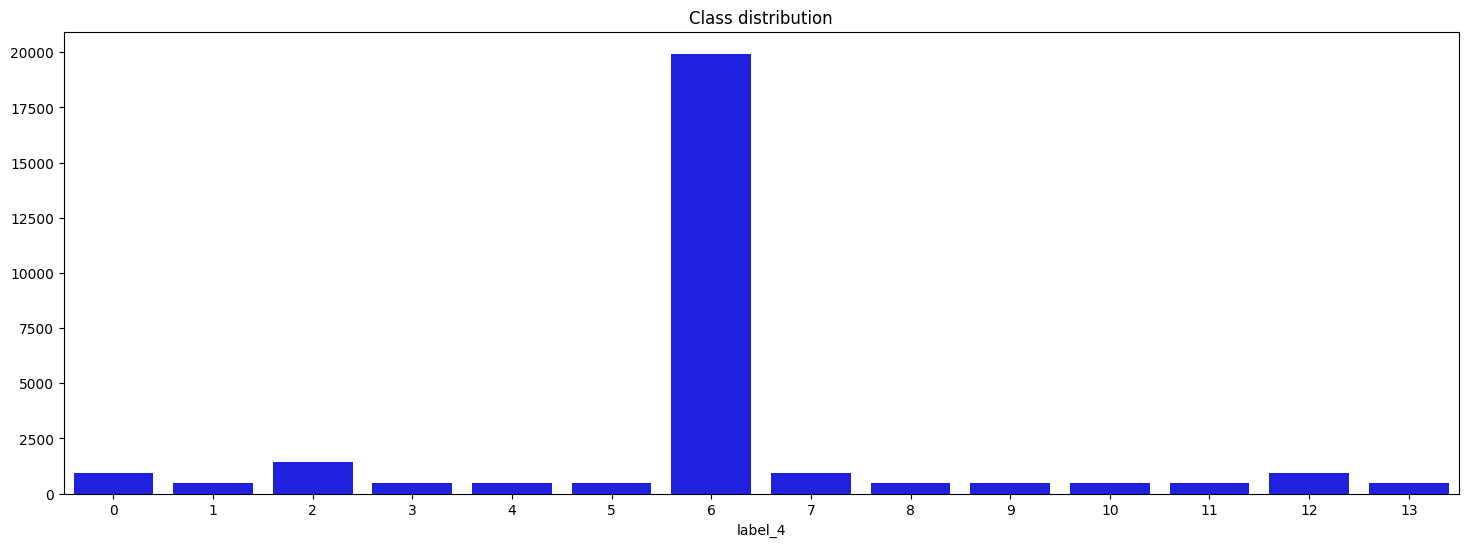

In [27]:
# Plot class distribution
plot_class_distribution(y_train_label_4)

In [28]:
# Robust scaling
X_train_label_4, X_valid_label_4, X_test_label_4 = robust_scale_data(
    X_train_label_4, X_valid_label_4, X_test_label_4)

In [29]:
# SMOTE Oversampling
X_train_resampled_label_4, y_train_resampled_label_4 = smote_oversampling(
    X_train_label_4, y_train_label_4, verbose=1)

Before SMOTE: Counter({6: 19938, 2: 1449, 0: 955, 12: 954, 7: 938, 13: 482, 1: 481, 11: 480, 10: 480, 3: 479, 5: 478, 9: 472, 4: 469, 8: 465})
After SMOTE: Counter({6: 19938, 13: 19938, 4: 19938, 5: 19938, 1: 19938, 2: 19938, 7: 19938, 3: 19938, 0: 19938, 12: 19938, 9: 19938, 8: 19938, 11: 19938, 10: 19938})


In [30]:
# Apply PCA
X_train_trf_label_4, X_valid_trf_label_4, X_test_trf_label_4 = pca(
    X_train_resampled_label_4, X_valid_label_4, X_test_label_4, n_components=0.97)

In [31]:
X_train_trf_label_4.shape

(279132, 339)

In [32]:
param_grid = {'C': [100, 10],
              'kernel': ['rbf'] }

# Support Vector Machine Best Model
best_model_4 = svc(X_train_trf_label_4, y_train_resampled_label_4,
                   X_valid_trf_label_4, y_valid_label_4, param_grid=param_grid, n_iter=2, cv=3)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 100}
Best score: 0.9945438000659187
Accuracy score 1.000


In [33]:
# Train selected Model ('kernel': 'rbf', 'C': 100)

y_pred_label_4 = best_model_4.predict(X_valid_trf_label_4)
score_label_4 = accuracy_score(y_valid_label_4, y_pred_label_4)
print("Accuracy score {:.3f}".format(score_label_4))

Accuracy score 1.000


In [34]:
# Predict test data
y_test_pred_label_4 = best_model_4.predict(X_test_trf_label_4)

In [35]:
# Create output csv file for label_4
create_output_csv(y_test_pred_label_4, "label_4")

In [ ]:
output_filename = f"Results/final.csv"
final_combined_data = pd.DataFrame()
final_combined_data["ID"] = test_data["ID"]
for i in range(1, 5):
  label_name = f"label_{i}"
  final_combined_data[label_name] = pd.read_csv(
      f"Results/{label_name}.csv")
final_combined_data.to_csv(output_filename, index=False)